In [34]:
# مكتبة التعامل مع بيئات الأتاري
!pip install ale_py
# مكتبة التعلم المُعزز
!pip install stable_baselines3
# تحديث مكتبة الأفلام
!pip install --upgrade moviepy

In [35]:
# استيراد مكتبة التعامل مع الألعاب
import ale_py

In [36]:
# دالة إنشاء بيئة أتاري
from stable_baselines3.common.env_util import make_atari_env

In [37]:
# معرف البيئة
env_id= 'ALE/Riverraid-v5'
#env_id= 'ALE/Pong-v5'
#env_id= 'ALE/Breakout-v5'
#env_id= 'ALE/MsPacman-v5'
#env_id= 'ALE/MarioBros-v5'

# إنشاء البيئة
env = make_atari_env(env_id, seed=0)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
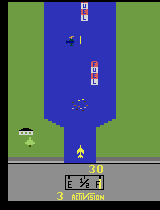

In [38]:
# إعادة التهيئة
obs = env.reset()
# الإظهار
env.render()

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'

In [41]:
# عدد دورات التدريب
total_timesteps=500000

In [42]:
# اسم اللعبة
id=env_id.split('/')[-1]
# اسم النموذج
model_name=f"PPO_{id}_{total_timesteps}"

In [43]:
# مسار حفظ النموذج
model_PPO_file_path=working_folder+model_name

In [44]:
# استيراد PPO
from stable_baselines3 import PPO
# تحميل النموذج
model_PPO = PPO.load(model_PPO_file_path, verbose=0)


In [45]:
# عدد حلقات الاختبار
episodes=32

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# استخدام النموذج في اللعب
episodes_total_reward=0
reward_history_after_ppo = []
frames=[]
for episode in range(episodes):
    obs  = env.reset()
    frames.append(env.render())
    done = False
    total_reward = 0
    while not done:
        action, _ = model_PPO.predict(obs, deterministic=True)
        obs, reward, done, infos = env.step(action)
        frames.append(env.render())
        total_reward += reward[0]
    reward_history_after_ppo.append(total_reward)
    episodes_total_reward+=total_reward
    print(f"PPO After Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"PPO Mean reward: {round(episodes_total_reward/episodes,2)}")

PPO After Training - Episode 1 - Total Reward: 27.0
PPO After Training - Episode 2 - Total Reward: 6.0
PPO After Training - Episode 3 - Total Reward: 2.0
PPO After Training - Episode 4 - Total Reward: 7.0
PPO After Training - Episode 5 - Total Reward: 18.0
PPO After Training - Episode 6 - Total Reward: 0.0
PPO After Training - Episode 7 - Total Reward: 0.0
PPO After Training - Episode 8 - Total Reward: 0.0
PPO After Training - Episode 9 - Total Reward: 26.0
PPO After Training - Episode 10 - Total Reward: 0.0
PPO After Training - Episode 11 - Total Reward: 2.0
PPO After Training - Episode 12 - Total Reward: 0.0
PPO After Training - Episode 13 - Total Reward: 26.0
PPO After Training - Episode 14 - Total Reward: 1.0
PPO After Training - Episode 15 - Total Reward: 1.0
PPO After Training - Episode 16 - Total Reward: 2.0
PPO After Training - Episode 17 - Total Reward: 22.0
PPO After Training - Episode 18 - Total Reward: 12.0
PPO After Training - Episode 19 - Total Reward: 5.0
PPO After Train

In [47]:
# دالة إنشاء فيديو
from moviepy import ImageSequenceClip

In [48]:
# مسار مجلد الفيديو
clips_folder='/content/drive/MyDrive/AtraiVideos/'
# اسم ملف الفيديو
clip_file_name=f"trained_{id}.mp4"
# مسار ملف الفيديو
clip_file_path = clips_folder + clip_file_name

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
print("Creating video, please wait...")
# إنشاء الفيديو
clip = ImageSequenceClip(frames, fps=10)


Creating video, please wait...


In [50]:
# حفظ الفيديو
clip.write_videofile(clip_file_path)


MoviePy - Building video /content/drive/MyDrive/AtraiVideos/trained_Riverraid-v5.mp4.
MoviePy - Writing video /content/drive/MyDrive/AtraiVideos/trained_Riverraid-v5.mp4



MoviePy - Done !
MoviePy - video ready /content/drive/MyDrive/AtraiVideos/trained_Riverraid-v5.mp4


In [51]:
# إغلاق البيئة
env.close()

print(f"Video saved as {clip_file_name}")

Video saved as trained_Riverraid-v5.mp4
